In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
app_train.corr()['TARGET'].sort_values().head(15)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
Name: TARGET, dtype: float64

In [5]:
app_train.corr()['TARGET'].sort_values().tail(15)

DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64

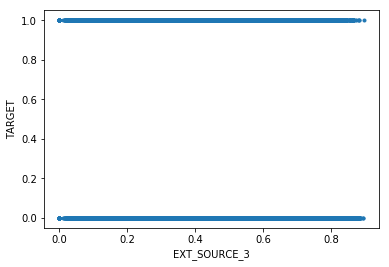

Correlation: -0.1789


In [49]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = app_train['EXT_SOURCE_3'].corr(app_train['TARGET'])
print("Correlation: %.4f" % (corr))

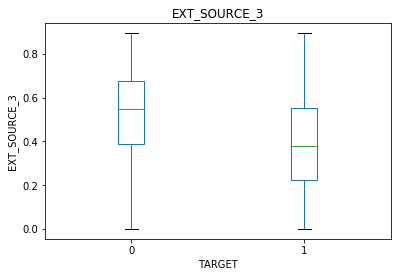

In [76]:
app_train.boxplot(column = 'EXT_SOURCE_3', by = 'TARGET', grid = False)
plt.suptitle('')
plt.ylabel('EXT_SOURCE_3')
plt.xlabel('TARGET')
plt.show()

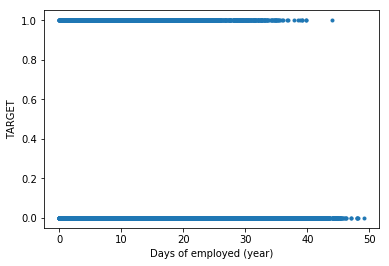

Correlation: -0.0750


In [54]:
plt.plot(app_train['DAYS_EMPLOYED']/(-365), app_train['TARGET'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('TARGET')
plt.show()
corr = (app_train['DAYS_EMPLOYED']/(-365)).corr(app_train['TARGET'])
print("Correlation: %.4f" % (corr))

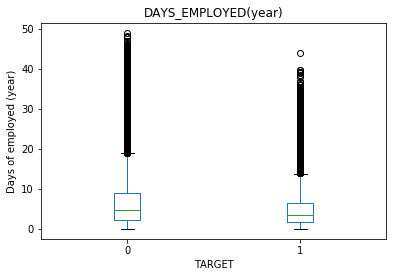

In [75]:
app_train['DAYS_EMPLOYED(year)'] = app_train['DAYS_EMPLOYED']/(-365)
app_train.boxplot(column = 'DAYS_EMPLOYED(year)', by = 'TARGET', grid = False)
plt.suptitle('')
plt.ylabel('Days of employed (year)')
plt.xlabel('TARGET')
plt.show()

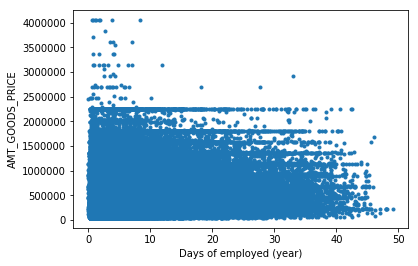

Correlation: 0.0934


In [44]:
plt.plot(app_train['DAYS_EMPLOYED']/(-365), app_train['AMT_GOODS_PRICE'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()
corr = (app_train['DAYS_EMPLOYED']/(-365)).corr(app_train['AMT_GOODS_PRICE'])
print("Correlation: %.4f" % (corr))

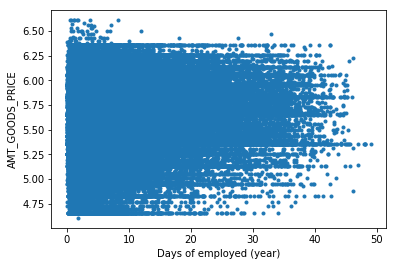

Correlation: 0.0907


In [48]:
plt.plot(app_train['DAYS_EMPLOYED']/(-365), np.log10(app_train['AMT_GOODS_PRICE']), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()
corr = (app_train['DAYS_EMPLOYED']/(-365)).corr(np.log10(app_train['AMT_GOODS_PRICE']))
print("Correlation: %.4f" % (corr))

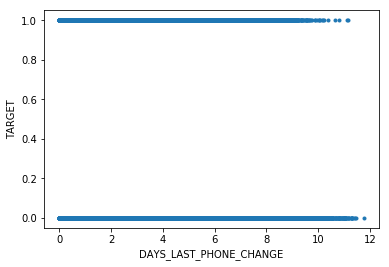

Correlation: -0.0552


In [67]:
plt.plot(app_train['DAYS_LAST_PHONE_CHANGE']/(-365), app_train['TARGET'], '.')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.ylabel('TARGET')
plt.show()
corr = (app_train['DAYS_LAST_PHONE_CHANGE']/(-365)).corr(app_train['TARGET'])
print("Correlation: %.4f" % (corr))

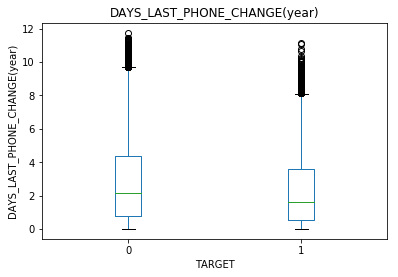

In [74]:
app_train['DAYS_LAST_PHONE_CHANGE(year)'] = app_train['DAYS_LAST_PHONE_CHANGE']/(-365)
app_train.boxplot(column = 'DAYS_LAST_PHONE_CHANGE(year)', by = 'TARGET', grid = False)
plt.suptitle('')
plt.xlabel('TARGET')
plt.ylabel('DAYS_LAST_PHONE_CHANGE(year)')
plt.show()

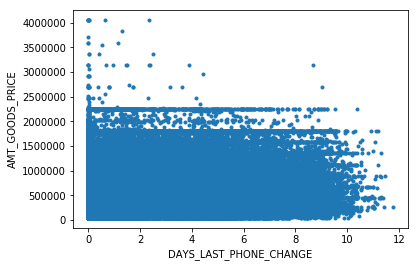

Correlation: 0.0763


In [45]:
plt.plot(app_train['DAYS_LAST_PHONE_CHANGE']/(-365), app_train['AMT_GOODS_PRICE'], '.')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()
corr = (app_train['DAYS_LAST_PHONE_CHANGE']/(-365)).corr(app_train['AMT_GOODS_PRICE'])
print("Correlation: %.4f" % (corr))

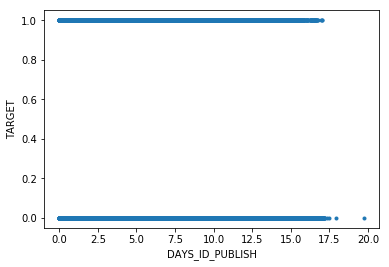

Correlation: -0.0515


In [68]:
plt.plot(app_train['DAYS_ID_PUBLISH']/(-365), app_train['TARGET'], '.')
plt.xlabel('DAYS_ID_PUBLISH')
plt.ylabel('TARGET')
plt.show()
corr = (app_train['DAYS_ID_PUBLISH']/(-365)).corr(app_train['TARGET'])
print("Correlation: %.4f" % (corr))

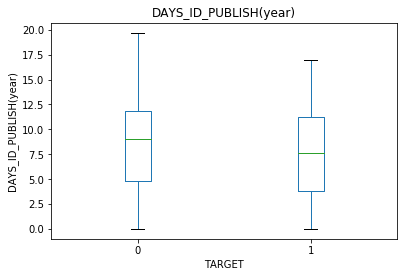

In [77]:
app_train['DAYS_ID_PUBLISH(year)'] = app_train['DAYS_ID_PUBLISH']/(-365)
app_train.boxplot(column = 'DAYS_ID_PUBLISH(year)', by = 'TARGET', grid = False)
plt.suptitle('')
plt.xlabel('TARGET')
plt.ylabel('DAYS_ID_PUBLISH(year)')
plt.show()

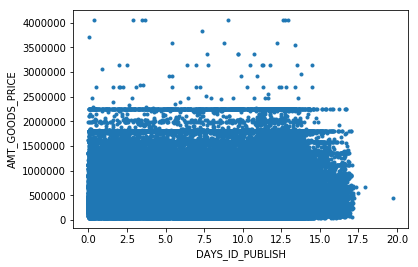

Correlation: 0.0093


In [46]:
plt.plot(app_train['DAYS_ID_PUBLISH']/(-365), app_train['AMT_GOODS_PRICE'], '.')
plt.xlabel('DAYS_ID_PUBLISH')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()
corr = (app_train['DAYS_ID_PUBLISH']/(-365)).corr(app_train['AMT_GOODS_PRICE'])
print("Correlation: %.4f" % (corr))

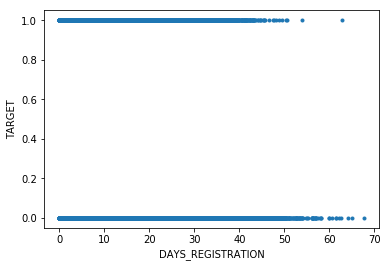

Correlation: -0.0420


In [69]:
plt.plot(app_train['DAYS_REGISTRATION']/(-365), app_train['TARGET'], '.')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('TARGET')
plt.show()
corr = (app_train['DAYS_REGISTRATION']/(-365)).corr(app_train['TARGET'])
print("Correlation: %.4f" % (corr))

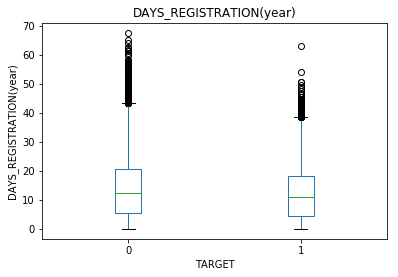

In [78]:
app_train['DAYS_REGISTRATION(year)'] = app_train['DAYS_REGISTRATION']/(-365)
app_train.boxplot(column = 'DAYS_REGISTRATION(year)', by = 'TARGET', grid = False)
plt.suptitle('')
plt.xlabel('TARGET')
plt.ylabel('DAYS_REGISTRATION(year)')
plt.show()

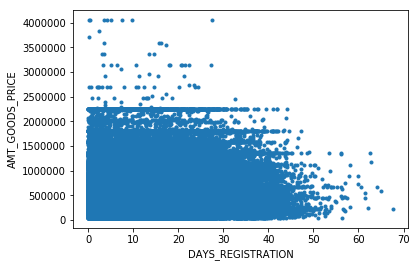

Correlation: -0.0116


In [47]:
plt.plot(app_train['DAYS_REGISTRATION']/(-365), app_train['AMT_GOODS_PRICE'], '.')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()
corr = (app_train['DAYS_REGISTRATION']/(-365)).corr(app_train['AMT_GOODS_PRICE'])
print("Correlation: %.4f" % (corr))

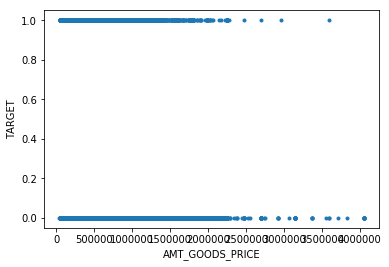

Correlation: -0.0396


In [38]:
plt.plot(app_train['AMT_GOODS_PRICE'], app_train['TARGET'], '.')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('TARGET')
plt.show()
corr = app_train['AMT_GOODS_PRICE'].corr(app_train['TARGET'])
print("Correlation: %.4f" % (corr))

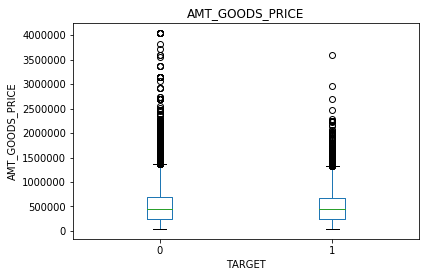

In [79]:
app_train.boxplot(column = 'AMT_GOODS_PRICE', by = 'TARGET', grid = False)
plt.suptitle('')
plt.xlabel('TARGET')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

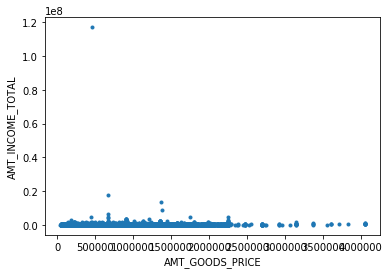

Correlation: 0.1596


In [86]:
plt.plot(app_train['AMT_GOODS_PRICE'], app_train['AMT_INCOME_TOTAL'], '.')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()
corr = app_train['AMT_GOODS_PRICE'].corr(app_train['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr))

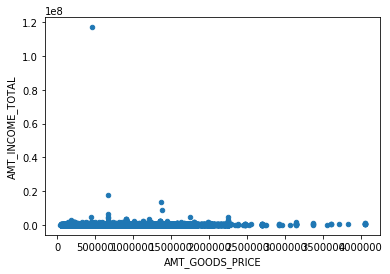

In [92]:
app_train.plot.scatter(x='AMT_GOODS_PRICE', y = 'AMT_INCOME_TOTAL')

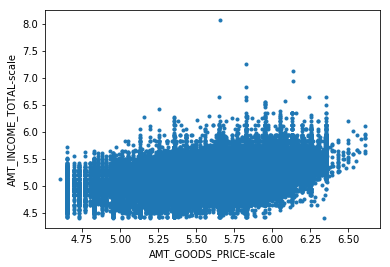

Correlation: 0.4265


In [84]:
plt.plot(np.log10(app_train['AMT_GOODS_PRICE']), np.log10(app_train['AMT_INCOME_TOTAL']), '.')
plt.xlabel('AMT_GOODS_PRICE-scale')
plt.ylabel('AMT_INCOME_TOTAL-scale')
plt.show()
corr = np.log10(app_train['AMT_GOODS_PRICE']).corr(np.log10(app_train['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr))